# Lecture 9 Scipy stats and data visualization part 1

## 1. Scipy stats
### Typical statistical tasks:
- possibility distribution
- summary statistics
- statistical tests

### Possibility distribution
Frequently used distributions
- uniform distribution
- normal distribution
- binomial distribution
- poisson distribution

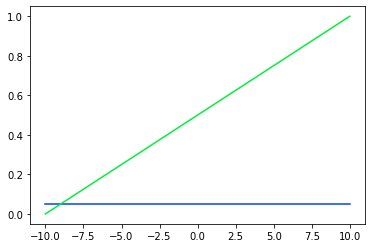

In [200]:
# uniform distribution

from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,500)
pdf = uniform.pdf(x, loc = -10, scale = 20)
cdf = uniform.cdf(x, loc = -10, scale = 20)
plt.plot(x, pdf)
plt.plot(x, cdf)

0.19947114020071635

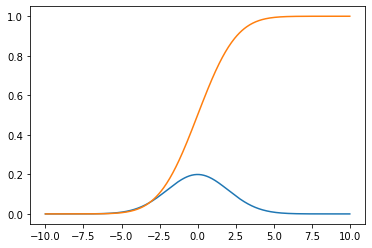

In [16]:
# normal distribution

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,500)
pdf = norm.pdf(x, loc = 0, scale = 2)
cdf = norm.cdf(x, loc = 0, scale = 2)
plt.plot(x, pdf)
plt.plot(x, cdf)

norm.pdf(0, loc = 0, scale = 2)

(array([  1.,   2.,  15.,  30.,  29.,  56.,  91., 121., 127., 140., 126.,
         99.,  74.,  41.,  25.,  14.,   8.,   0.,   0.,   1.]),
 array([-3.11264494, -2.77655466, -2.44046438, -2.1043741 , -1.76828381,
        -1.43219353, -1.09610325, -0.76001297, -0.42392268, -0.0878324 ,
         0.24825788,  0.58434816,  0.92043845,  1.25652873,  1.59261901,
         1.92870929,  2.26479958,  2.60088986,  2.93698014,  3.27307042,
         3.60916071]),
 <BarContainer object of 20 artists>)

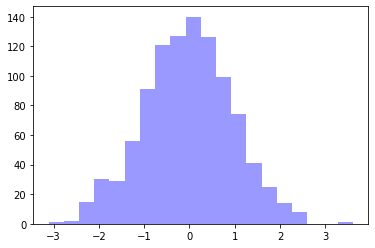

In [202]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


x = norm.rvs(loc = 0, scale = 1, size = 1000)

plt.hist(x, 20, facecolor='blue', alpha = 0.4)

### Summary statistics


In [203]:
# describe: returns several descriptive statistics
from scipy import stats
import numpy as np

x = norm.rvs(loc = 0, scale = 1, size = 1000)
xstats = stats.describe(x)
xstats


DescribeResult(nobs=1000, minmax=(-2.862381652099057, 2.819521998857281), mean=-0.013887161277519381, variance=1.0499343744584728, skewness=-0.08103984740628037, kurtosis=-0.2595012391062155)

In [205]:
# other common stats
x = norm.rvs(loc = 0, scale = 1, size = 1000)
print(np.mean(x))
print(stats.gmean(x)) # geometric mean
print(stats.mode(x))

group1 = np.array([14, 15, 15, 16, 13, 8, 14, 14, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
print(stats.mode(group1))

-0.04056185324814793
nan
ModeResult(mode=array([-3.39310861]), count=array([1]))
ModeResult(mode=array([14]), count=array([5]))


### Statistical tests

ShapiroResult(statistic=0.9387214779853821, pvalue=0.2267775684595108)
ShapiroResult(statistic=0.9664195775985718, pvalue=0.6782065033912659)


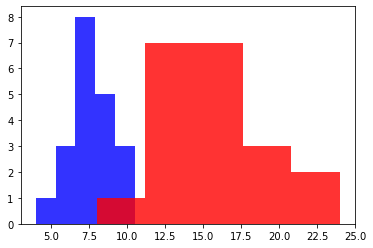

In [209]:
# student t test
from scipy import stats
import numpy as np
group1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12]) * 0.5
group2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])


import matplotlib.pyplot as plt

plt.hist(group1, 5, facecolor='blue', alpha = 0.8)
plt.hist(group2, 5, facecolor='red', alpha = 0.8)
stats.ttest_ind(a=group1, b=group2)

# Shapiro-Wilk normality test
print(stats.shapiro(group1))
print(stats.shapiro(group2))

## 2. Data visualization part 1: matplotlib

### basics
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

### examples
https://matplotlib.org/stable/plot_types/index.html
https://matplotlib.org/stable/gallery/
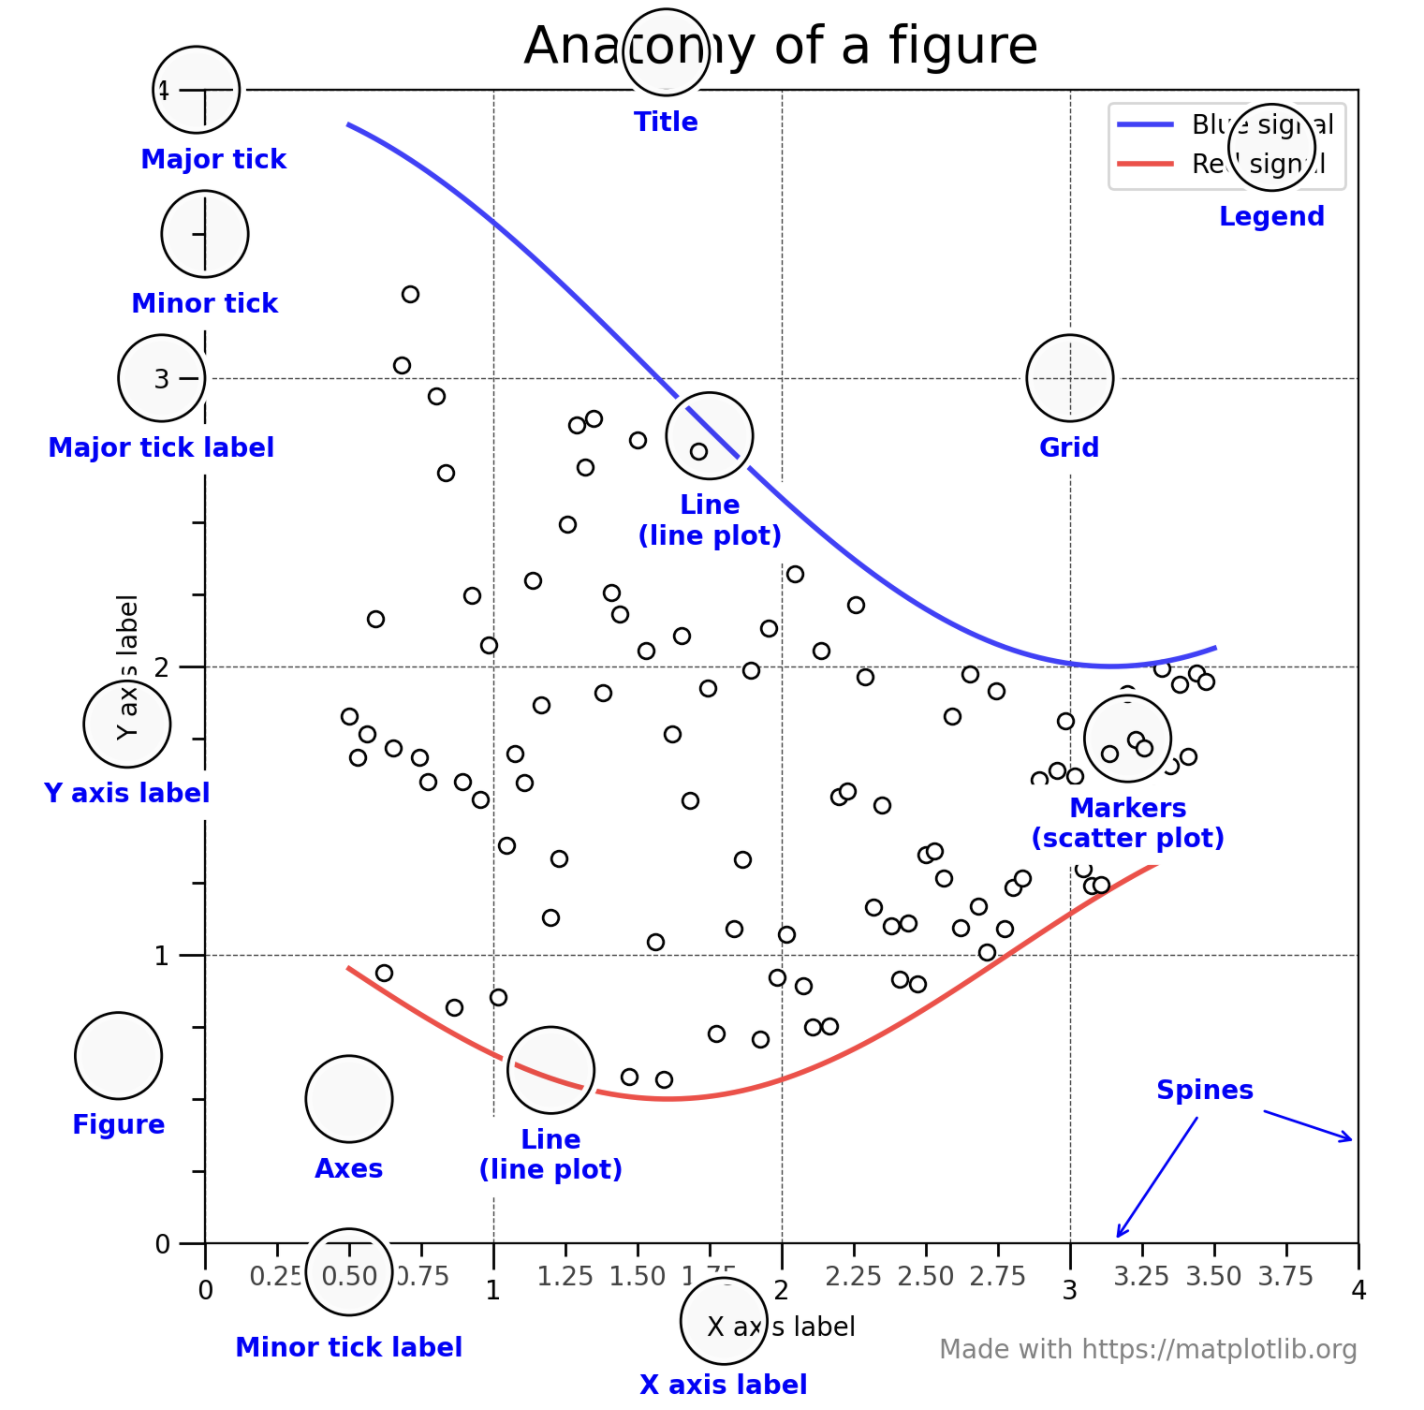

### Figure (your whole figure)
### Axes (panels)
### Axis (scale and limits)
### Artist (everything visible)

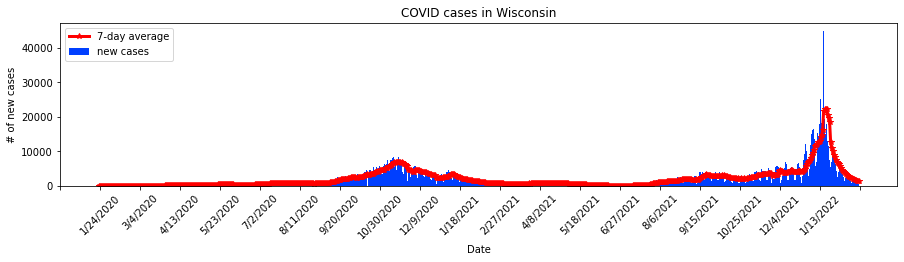

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data for plots
DF = pd.read_csv("COVID19-Historical-V2-ST.csv")

x = DF.Date
y = DF.POS_NEW_CP
y1 = DF.POS_7DAYAVG_CP

fig, ax = plt.subplots(figsize=(15, 3))

ax.bar(x, y, label='new cases')
ax.set_xlabel("Date")
ax.set_ylabel("# of new cases")
ax.set_title("COVID cases in Wisconsin")
ax.plot(x, y1, 'r-*', linewidth = 3, label='7-day average')

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 40))
ax.tick_params(axis='x', labelrotation = 45)
ax.legend()

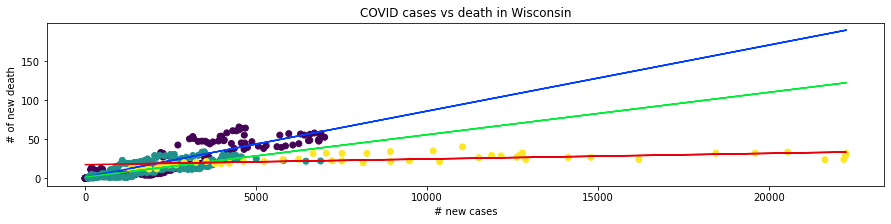

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data for plots
DF = pd.read_csv("COVID19-Historical-V2-ST.csv")

x = DF.POS_7DAYAVG_CP
y = DF.DTH_7DAYAVG_CP
xtime = pd.to_datetime(DF.Date)
year = xtime.dt.year
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x, y, s=None, c=year)
ax.set_xlabel("# new cases")
ax.set_ylabel("# of new death")
ax.set_title("COVID cases vs death in Wisconsin")

m, b = np.polyfit(x[year==2020], y[year==2020], 1)
ax.plot(x, m*x + b)
m, b = np.polyfit(x[year==2021], y[year==2021], 1)
ax.plot(x, m*x + b)
m, b = np.polyfit(x[year==2022], y[year==2022], 1)
ax.plot(x, m*x + b)

'\nplt.figure(figsize=(10, 2.7))\nplt.plot(x, y1, label=\'Positive 7-day average\')  # Plot the first line\nplt.plot(x, y2, label=\'Negative 7-day average\')  # Plot the second line\n\nplt.xlabel(\'Date\')\nplt.ylabel(\'# of cases\')\nplt.title("Test results of COVID in WI")\nplt.legend();\n'

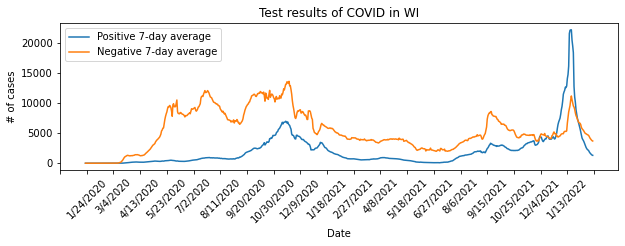

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data for plots
DF = pd.read_csv("COVID19-Historical-V2-ST.csv")

x = DF.Date
y1 = DF.POS_7DAYAVG_CP
y2 = DF.NEG_7DAYAVG

fig, ax = plt.subplots(figsize=(10, 2.7))
ax.plot(x, y1, label='Positive 7-day average')  # Plot the first line
ax.plot(x, y2, label='Negative 7-day average')  # Plot the second line
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('# of cases')  # Add a y-label to the axes.
ax.set_title("Test results of COVID in WI")  # Add a title to the axes.
ax.legend();  # Add a legend.
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 40))
ax.tick_params(axis='x', labelrotation = 45)


'''
plt.figure(figsize=(10, 2.7))
plt.plot(x, y1, label='Positive 7-day average')  # Plot the first line
plt.plot(x, y2, label='Negative 7-day average')  # Plot the second line

plt.xlabel('Date')
plt.ylabel('# of cases')
plt.title("Test results of COVID in WI")
plt.legend();
'''

/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_52757/4249322635.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y2, 'r-o', label='Negative 7-day average', MarkerSize=3)  # Plot the second line


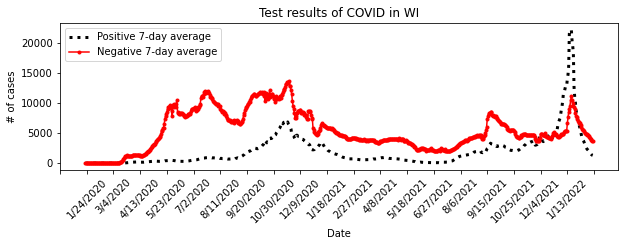

In [125]:
# Changing line styles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data for plots
DF = pd.read_csv("COVID19-Historical-V2-ST.csv")

x = DF.Date
y1 = DF.POS_7DAYAVG_CP
y2 = DF.NEG_7DAYAVG

fig, ax = plt.subplots(figsize=(10, 2.7))
ax.plot(x, y1, 'k:', label='Positive 7-day average', linewidth=3)  # Plot the first line
ax.plot(x, y2, 'r-o', label='Negative 7-day average', MarkerSize=3)  # Plot the second line
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('# of cases')  # Add a y-label to the axes.
ax.set_title("Test results of COVID in WI")  # Add a title to the axes.
ax.legend();  # Add a legend.
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 40))
ax.tick_params(axis='x', labelrotation = 45)
#ax.set_title(r'$\beta_i=100$')

/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_52757/872314094.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y2, 'r-o', label='Negative 7-day average', MarkerSize=3)  # Plot the second line


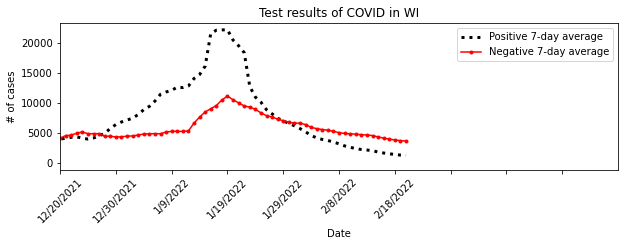

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data for plots
DF = pd.read_csv("COVID19-Historical-V2-ST.csv")

x = DF.Date
y1 = DF.POS_7DAYAVG_CP
y2 = DF.NEG_7DAYAVG

fig, ax = plt.subplots(figsize=(10, 2.7))
ax.plot(x, y1, 'k:', label='Positive 7-day average', linewidth=3)  # Plot the first line
ax.plot(x, y2, 'r-o', label='Negative 7-day average', MarkerSize=3)  # Plot the second line
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('# of cases')  # Add a y-label to the axes.
ax.set_title("Test results of COVID in WI")  # Add a title to the axes.
ax.legend();  # Add a legend.

# set xlim
start, end = ax.get_xlim()
ax.set_xlim(end-100, end);

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
ax.tick_params(axis='x', labelrotation = 45)
#year = x.dt.year
#month = x.dt.month

/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_52757/2682806066.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y2, 'r-o', label='Negative 7-day average', MarkerSize=3)  # Plot the second line


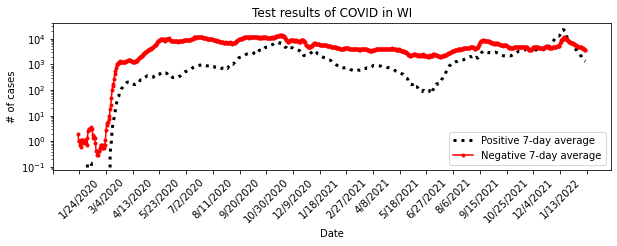

In [223]:
# change y axis to log scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data for plots
DF = pd.read_csv("COVID19-Historical-V2-ST.csv")

x = DF.Date
y1 = DF.POS_7DAYAVG_CP
y2 = DF.NEG_7DAYAVG

fig, ax = plt.subplots(figsize=(10, 2.7))
ax.plot(x, y1, 'k:', label='Positive 7-day average', linewidth=3)  # Plot the first line
ax.plot(x, y2, 'r-o', label='Negative 7-day average', MarkerSize=3)  # Plot the second line
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('# of cases')  # Add a y-label to the axes.
ax.set_yscale('log')
ax.set_title("Test results of COVID in WI")  # Add a title to the axes.
ax.legend();  # Add a legend.
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 40))
ax.tick_params(axis='x', labelrotation = 45)

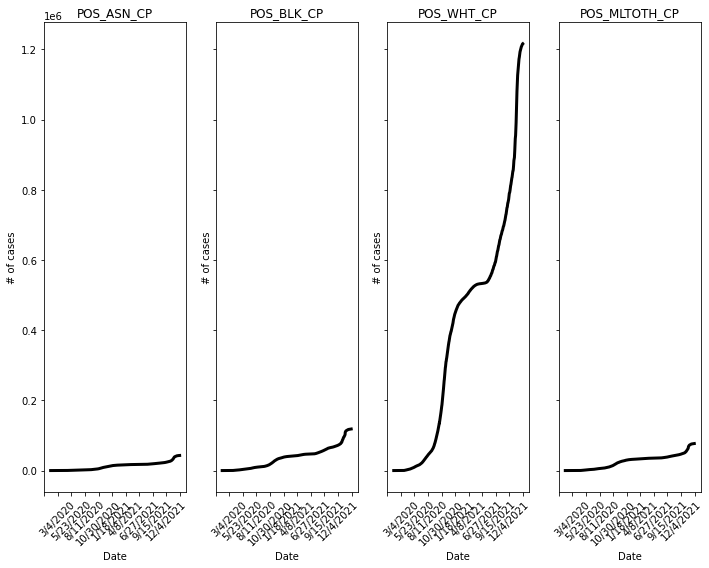

In [232]:
# subplots

DF = pd.read_csv("COVID19-Historical-V2-ST.csv")

x = DF.Date
y1 = DF.POS_ASN_CP
y2 = DF.POS_BLK_CP
y3 = DF.POS_WHT_CP
y4 = DF.POS_MLTOTH_CP


fig, axs = plt.subplots(1,4, figsize=(10, 8), sharex=True, sharey=True)

axs[0].plot(x, y1, 'k-', label='POS_ASN_CP', linewidth=3)  # Plot the first line
axs[0].set_xlabel('Date')  # Add an x-label to the axes.
axs[0].set_ylabel('# of cases')  # Add a y-label to the axes.
axs[0].set_title("POS_ASN_CP")  # Add a title to the axes.
start, end = axs[0].get_xlim()
axs[0].xaxis.set_ticks(np.arange(start, end, 80))
axs[0].tick_params(axis='x', labelrotation = 45)

axs[1].plot(x, y2, 'k-', label='POS_BLK_CP', linewidth=3)  # Plot the first line
axs[1].set_xlabel('Date')  # Add an x-label to the axes.
axs[1].set_ylabel('# of cases')  # Add a y-label to the axes.
axs[1].set_title("POS_BLK_CP")  # Add a title to the axes.
start, end = axs[1].get_xlim()
axs[1].xaxis.set_ticks(np.arange(start, end, 80))
axs[1].tick_params(axis='x', labelrotation = 45)

axs[2].plot(x, y3, 'k-', label='POS_WHT_CP', linewidth=3)  # Plot the first line
axs[2].set_xlabel('Date')  # Add an x-label to the axes.
axs[2].set_ylabel('# of cases')  # Add a y-label to the axes.
axs[2].set_title("POS_WHT_CP")  # Add a title to the axes.
start, end = axs[2].get_xlim()
axs[2].xaxis.set_ticks(np.arange(start, end, 80))
axs[2].tick_params(axis='x', labelrotation = 45)

axs[3].plot(x, y4, 'k-', label='POS_MLTOTH_CP', linewidth=3)  # Plot the first line
axs[3].set_xlabel('Date')  # Add an x-label to the axes.
# axs[3].set_ylabel('# of cases')  # Add a y-label to the axes.
axs[3].set_title("POS_MLTOTH_CP")  # Add a title to the axes.
start, end = axs[3].get_xlim()
axs[3].xaxis.set_ticks(np.arange(start, end, 80))
axs[3].tick_params(axis='x', labelrotation = 45)

fig.tight_layout()

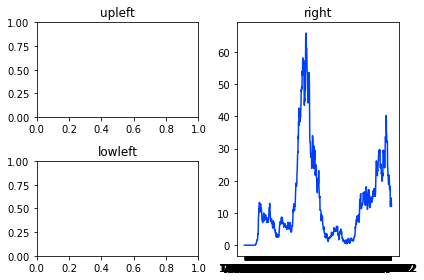

In [235]:
fig, axs = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']])
axs['upleft'].set_title('upleft')
axs['lowleft'].set_title('lowleft')
axs['right'].set_title('right');
axs['right'].plot(x,y)
fig.tight_layout()

# Homework

The TRENDYdata.csv records the results of a global terrestrial biosphere model (TBM) for simulating terrestrial ecosystem carbon cycling from 1700 to 2017. Scientists are interested in the relationship between the global mean NPP (net primary productivity; the net carbon sequestration by plants) and tas (land surface temperature) but different TBMs may have different results. You are asked to help bulid a simple linear model that predicts NPP with tas (NPP = a*tas+b) for each TBM. DO NOT use the existing functions in python and packages that can directly give you the answer. Please use scipy's optimize package to find the best a and b parameters for your model. Save your code and the optimized a and b in a table in a Jupyter Notebook Markdown file and put it into your homework github repo. Due before the class on next Tuesday.

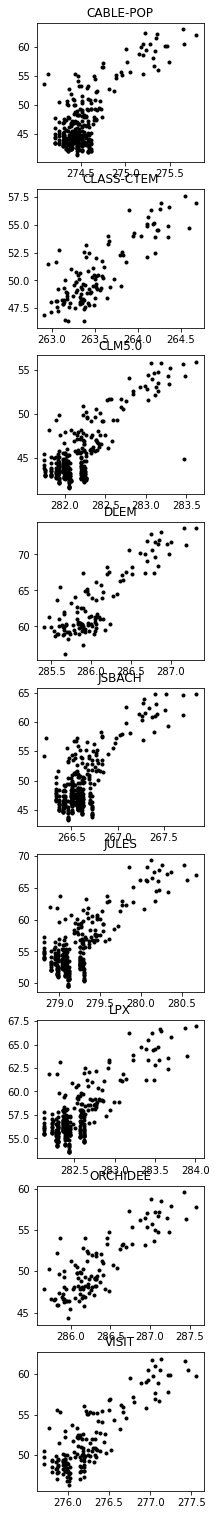

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data for plots
DF = pd.read_csv("TRENDYdata.csv")
DF = DF.loc[DF.tas<1000,]

nmodels = len(DF.Model.unique())
fig, axs = plt.subplots(nmodels,1, figsize=(3, 27))
i = 0
for model in DF.Model.unique():
    subdf = DF.loc[DF.Model==model,]
    axs[i].plot(subdf.tas,subdf.npp,'k.')
    axs[i].set_title(model)
    i += 1